1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


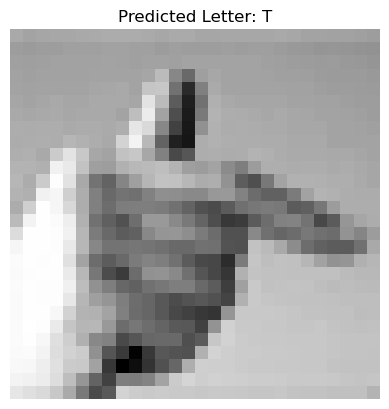

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


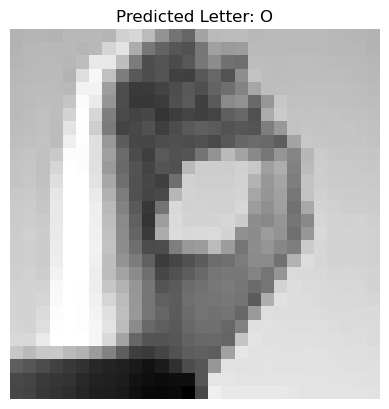

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


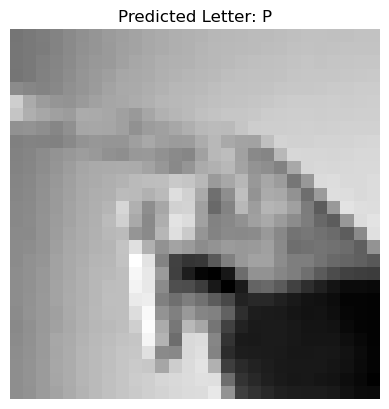

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


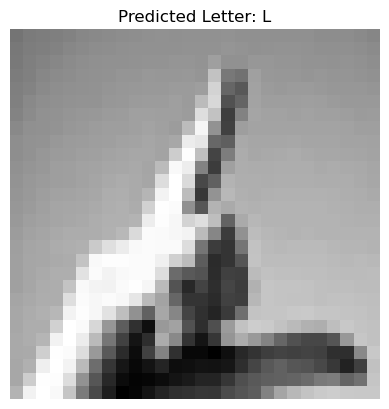

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


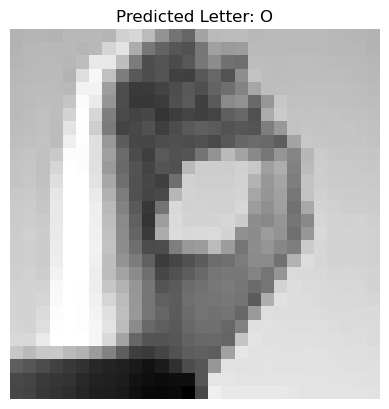

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


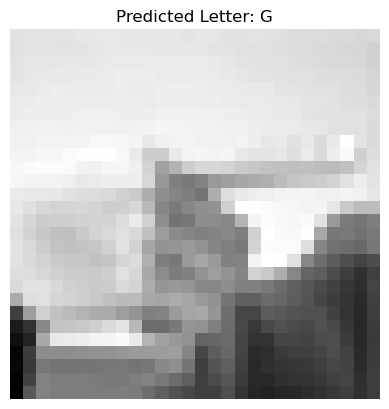

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


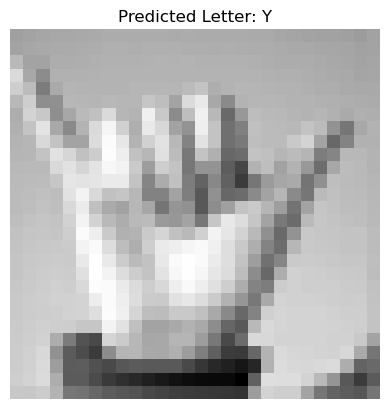

Predicted Letters: ['T', 'O', 'P', 'L', 'O', 'G', 'Y']
Predicted Word: TOPLOGY
Corrected Word: topology


In [3]:
import numpy as np
from tensorflow.keras.models import load_model
from spellchecker import SpellChecker
from PIL import Image
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('sign_language_recognition_model.h5')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the class mapping (excluding index 9)
class_mapping = [chr(i + 65) for i in range(26) if i != 9]

# Function to preprocess images
def preprocess_image(image_path):
    # Open the image file and convert it to grayscale
    with Image.open(image_path) as img:
        img = img.convert("L")  # Convert to grayscale
        img = img.resize((28, 28))  # Resize to 28x28
        image = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
        image = image.reshape(1, 28, 28, 1)  # Reshape for the model
    return image, np.array(img)

# Function to predict a single letter
def predict_letter(image_path):
    image, display_image = preprocess_image(image_path)
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)
    predicted_letter = class_mapping[predicted_class]
    
    # Display the image being predicted
    plt.imshow(display_image, cmap="gray")
    plt.title(f"Predicted Letter: {predicted_letter}")
    plt.axis("off")
    plt.show()
    
    return predicted_letter

# Example: List of image paths
paths = [      r"C:\Users\Lenovo\Pictures\Screenshots\Screenshot 2025-01-04 224648.png",#0 A
               r"C:\Users\Lenovo\Pictures\Screenshots\Screenshot 2025-01-04 225136.png",#1 B
               r"C:\Users\Lenovo\Pictures\Screenshots\Screenshot 2025-01-04 225400.png",#2 C
               r"C:\Users\Lenovo\Pictures\Screenshots\Screenshot 2025-01-04 225438.png",#3 D
               r"C:\Users\Lenovo\Pictures\Screenshots\Screenshot 2025-01-04 225553.png",#4 E
               r"C:\Users\Lenovo\Pictures\Screenshots\Screenshot 2025-01-04 225653.png",#5 F
               r"C:\Users\Lenovo\Pictures\Screenshots\Screenshot 2025-01-04 225726.png",#6 G
               r"C:\Users\Lenovo\Pictures\Screenshots\Screenshot 2025-01-04 225755.png",#7 H
               r"C:\Users\Lenovo\Pictures\Screenshots\Screenshot 2025-01-04 225825.png",#8 I
               r"C:\Users\Lenovo\Pictures\Screenshots\Screenshot 2025-01-04 225854.png",#9 K 
               r"C:\Users\Lenovo\Pictures\Screenshots\Screenshot 2025-01-04 230002.png",#10 L
               r"C:\Users\Lenovo\Pictures\Screenshots\Screenshot 2025-01-04 230134.png",#11 M
               r"C:\Users\Lenovo\Pictures\Screenshots\Screenshot 2025-01-04 230159.png",#12 N
               r"C:\Users\Lenovo\Pictures\Screenshots\Screenshot 2025-01-04 230232.png",#13 O
               r"C:\Users\Lenovo\Pictures\Screenshots\Screenshot 2025-01-04 230309.png",#14 P
               r"C:\Users\Lenovo\Pictures\Screenshots\Screenshot 2025-01-04 230333.png",#15 Q
               r"C:\Users\Lenovo\Pictures\Screenshots\Screenshot 2025-01-04 230417.png",#16 R
               r"C:\Users\Lenovo\Pictures\Screenshots\Screenshot 2025-01-04 230613.png",#17 S
               r"C:\Users\Lenovo\Pictures\Screenshots\Screenshot 2025-01-04 230646.png",#18 T
               r"C:\Users\Lenovo\Pictures\Screenshots\Screenshot 2025-01-04 230704.png",#19 U
               r"C:\Users\Lenovo\Pictures\Screenshots\Screenshot 2025-01-04 230830.png",#20 V
               r"C:\Users\Lenovo\Pictures\Screenshots\Screenshot 2025-01-04 230854.png",#21 W
               r"C:\Users\Lenovo\Pictures\Screenshots\Screenshot 2025-01-04 230921.png",#22 X
               r"C:\Users\Lenovo\Pictures\Screenshots\Screenshot 2025-01-04 230946.png"#23 Y
              ]

image_paths = [
     paths[18],
     paths[13],
     paths[14],
    paths[10],
    paths[13],
     paths[6],
     paths[23]
]

# Predict letters for the series of images
predicted_letters = [predict_letter(image_path) for image_path in image_paths]
print("Predicted Letters:", predicted_letters)

# Combine letters to form a word
predicted_word = ''.join(predicted_letters)
print("Predicted Word:", predicted_word)

# Use a spellchecker to correct the word
spell = SpellChecker()
corrected_word = spell.correction(predicted_word)
print("Corrected Word:", corrected_word)
